Global Store Analysis (2012-2015)

Questions

1) Business location summary

2) Total Product

3) Total Profit

4) Highest and Lowest sales location

5) Top 10 product which has highest sale in country

6) Country wise Profit

7) Time Series Forecasting till 2018

________________________________________________
 Loss Analysis

Reason for customer in loss

Method used

Customer Segmentation

Group by Segment and compute mean loss

Group by Order Priority and compute mean loss

Detailed Loss Analysis

Analyze the factors contributing to losses

Heatmap of Correlations between Factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('/content/global_superstore_2016.xlsx')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
data.shape

(51290, 24)

In [5]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [7]:
data.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,41296
City,0


In [8]:
data_new= data.drop(['Postal Code'],axis=1)

In [9]:
data_new.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [10]:
data_new.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

##EDA
# Business location summary

In [11]:
import plotly.express as px

In [18]:
location_summary = data_new.groupby('Country').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Shipping Cost': 'sum'
}).reset_index()

print(location_summary)

            Country        Sales       Profit  Quantity  Shipping Cost
0       Afghanistan  21673.32000   5460.30000       228       2300.230
1           Albania   3888.12000    709.32000        40        700.570
2           Algeria  36091.59000   9106.50000       454       3744.410
3            Angola  25554.00000   6494.97000       317       2430.400
4         Argentina  57511.78328 -18693.79672      1504       6426.362
..              ...          ...          ...       ...            ...
160         Vietnam  65210.06580  -1697.31420       991       7655.340
161  Western Sahara    666.36000    300.42000         4         72.520
162           Yemen   2465.71200  -3706.45800        71        292.630
163          Zambia  26035.50000   7001.73000       251       3074.200
164        Zimbabwe   3765.10500  -5428.78500       190        504.220

[165 rows x 5 columns]


In [19]:
location_summary.head()

,Country,Sales,Profit,Quantity,Shipping Cost
0,Afghanistan,21673.32000,5460.30000,228,2300.230
1,Albania,3888.12000,709.32000,40,700.570
2,Algeria,36091.59000,9106.50000,454,3744.410
3,Angola,25554.00000,6494.97000,317,2430.400
4,Argentina,57511.78328,-18693.79672,1504,6426.362


In [23]:
top_10_countries = location_summary.sort_values(by='Sales', ascending=False).head(10)

In [28]:
print(top_10_countries['Country'])

156     United States
6           Australia
50             France
30              China
54            Germany
94             Mexico
66              India
155    United Kingdom
67          Indonesia
20             Brazil
Name: Country, dtype: object


In [25]:
top_10_countries.head(10)

,Country,Sales,Profit,Quantity,Shipping Cost
156,United States,2.297201e+06,286397.02170,37873,240011.7904
6,Australia,9.252359e+05,103907.43300,10673,100505.0200
50,France,8.589311e+05,109029.00300,10804,95485.8100
30,China,7.005620e+05,150683.08500,7081,79012.0200
54,Germany,6.281362e+05,107190.32550,7739,63943.0900
94,Mexico,6.215526e+05,102453.58552,9972,67731.1600
66,India,5.894860e+05,129050.59500,5755,61840.4300
155,United Kingdom,5.285763e+05,111900.15000,6161,53648.2740
67,Indonesia,4.048875e+05,15608.67790,5237,44046.6240
20,Brazil,3.599249e+05,29686.89896,6123,38221.2780


In [55]:
total_profit = top_10_countries['Profit'].sum()
print(f"Total profit in top 10 countries: {total_profit}")

Total profit in top 10 countries: 1145906.7755799997


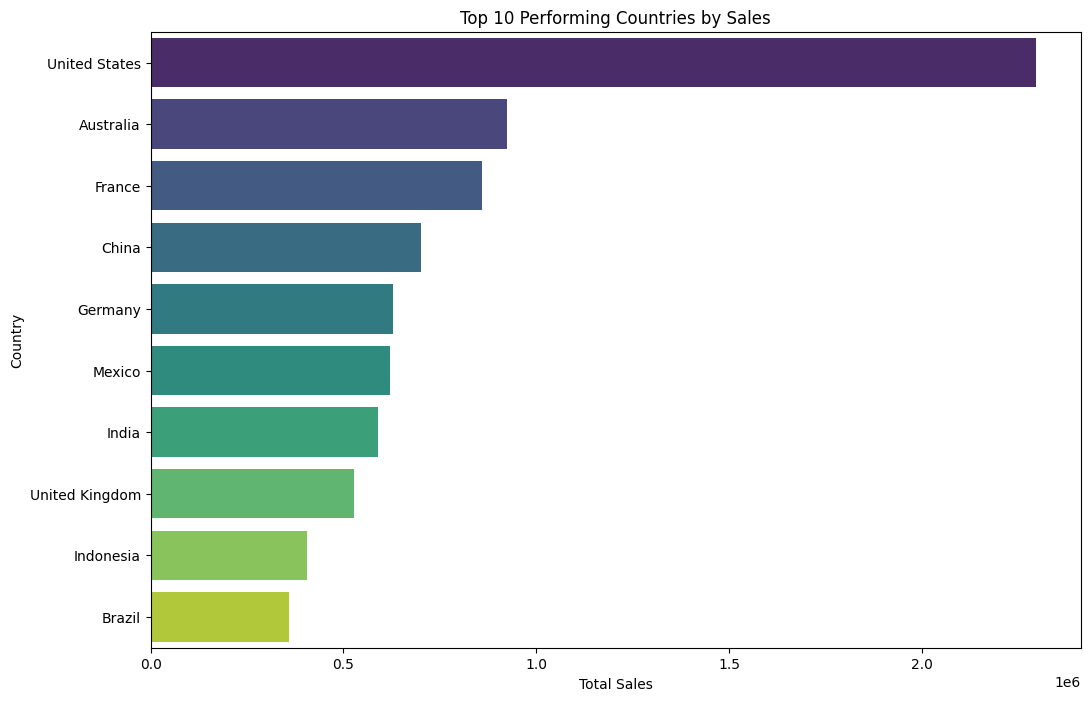

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Performing Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

In [33]:
bottom_10_countries = location_summary.sort_values(by='Sales', ascending=True).head(10)

In [34]:
bottom_10_countries


,Country,Sales,Profit,Quantity,Shipping Cost
146,The Gambia,19.98,9.57,1,1.350
137,Suriname,23.64,3.06,3,1.510
14,Belize,75.12,30.34,7,8.979
109,Oman,76.65,37.02,3,8.280
45,Equatorial Guinea,150.51,44.46,3,10.380
5,Armenia,156.75,69.09,3,13.500
16,Bhutan,164.07,21.24,3,12.290
46,Eritrea,187.74,76.20,4,8.550
87,Macedonia,209.64,43.38,6,19.170
51,French Guiana,224.06,16.50,9,37.118


Counties in loss

In [54]:
countries_in_loss = location_summary[location_summary['Profit'] < 0]

In [39]:
countries_in_loss

,Country,Sales,Profit,Quantity,Shipping Cost
4,Argentina,57511.78328,-18693.79672,1504,6426.362
36,Cyprus,437.31000,-192.06000,8,4.800
39,Denmark,8638.05300,-4282.04700,220,894.110
41,Dominican Republic,126140.58128,-7613.49872,2736,14664.067
62,Haiti,11038.32900,-4187.31100,392,1337.553
63,Honduras,90125.64860,-29482.37140,2556,9770.487
70,Ireland,16639.50900,-7392.38100,414,2025.260
76,Kazakhstan,4605.44400,-7099.89600,209,535.270
80,Laos,590.13360,-172.91640,5,40.030
85,Lithuania,6724.33200,-8966.11800,143,1005.430


In [53]:
total_loss = countries_in_loss['Profit'].sum()
print(f"Total loss in loss-making countries: {total_loss}")

Total loss in loss-making countries: -448091.7269399999


In [51]:
countries_in_loss['Country'].head(10)

,Country
4,Argentina
36,Cyprus
39,Denmark
41,Dominican Republic
62,Haiti
63,Honduras
70,Ireland
76,Kazakhstan
80,Laos
85,Lithuania


## Business location summary

Ans: Top performing countries are

United States, Australia, France, China, Germany, Mexico, India, United Kingdom,   Indonesia, Brazil

Total profit in top 10 countries: $1145906.7755799997


Countries in losses are

Argentina
Cyprus
Denmark
Dominican Republic
Haiti
Honduras
Ireland
Kazakhstan
Laos
Lithuani

Total loss in loss-making countries:$-448091.7269399999

In [58]:
sub_category_summary = data_new.groupby('Sub-Category').agg({
    'Profit': 'sum'
}).reset_index()

# Step 2: Find the best performing sub-category based on Profit
best_sub_category = sub_category_summary.sort_values(by='Profit', ascending=False).head(10)

# Print the best performing sub-category and its profit
print(f"Best performing sub-category:\n{best_sub_category}")

Best performing sub-category:
   Sub-Category        Profit
6       Copiers  258567.54818
13       Phones  216717.00580
4     Bookcases  161924.41950
1    Appliances  141562.58770
5        Chairs  140396.26750
0   Accessories  129626.30620
14      Storage  108416.68060
3       Binders   72433.15160
11     Machines   58867.87300
12        Paper   58111.65350


In [61]:
Sub_cat_in_loss = sub_category_summary[sub_category_summary['Profit'] < 0].head(10)

In [62]:
Sub_cat_in_loss

,Sub-Category,Profit
16,Tables,-64083.3887


In [63]:
bottom_10_subcat = sub_category_summary.sort_values(by='Profit', ascending=True).head(10)

In [64]:
bottom_10_subcat

,Sub-Category,Profit
16,Tables,-64083.3887
8,Fasteners,13844.2889
10,Labels,14988.9237
15,Supplies,22559.1953
7,Envelopes,28849.4873
9,Furnishings,46845.4319
2,Art,57829.8593
12,Paper,58111.6535
11,Machines,58867.8730
3,Binders,72433.1516


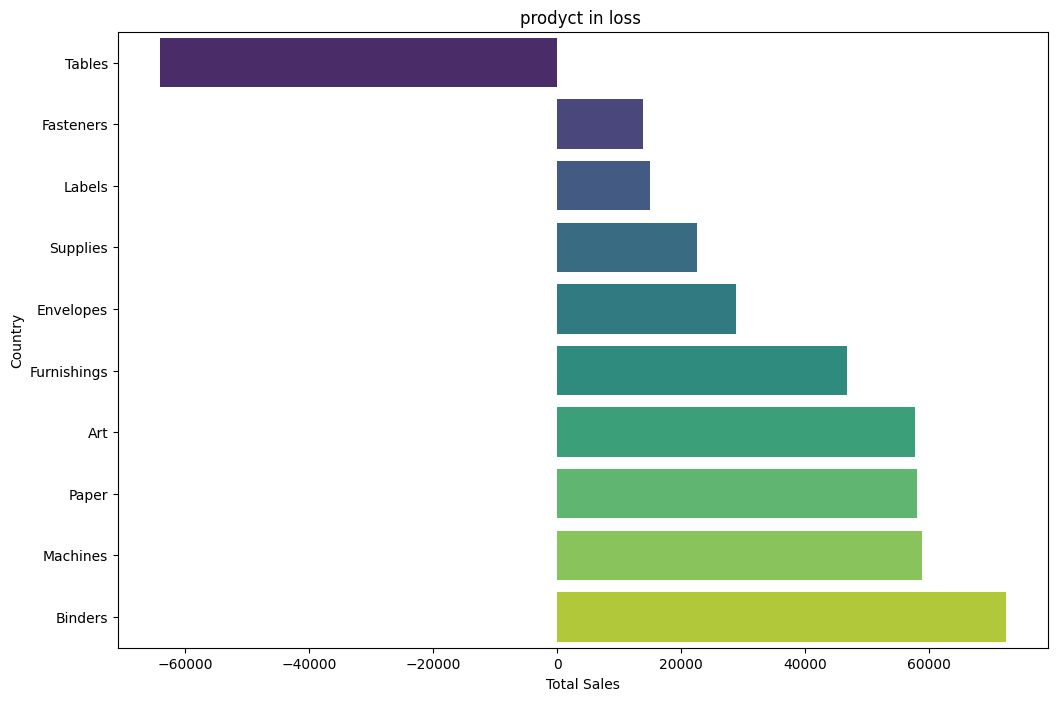

In [66]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Profit', y='Sub-Category', data=bottom_10_subcat, palette='viridis')
plt.title('prodyct in loss ')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

In [68]:
sub_category_quantity = data_new.groupby('Sub-Category').agg({
    'Quantity': 'sum'
}).reset_index()


max_quantity_sub_category = sub_category_quantity.sort_values(by='Quantity', ascending=False).head(10)


print(f"Sub-Category with maximum quantity bookings:\n{max_quantity_sub_category}")

Sub-Category with maximum quantity bookings:
   Sub-Category  Quantity
3       Binders     21403
14      Storage     16884
2           Art     16215
12        Paper     12672
5        Chairs     12336
13       Phones     11870
9   Furnishings     11163
0   Accessories     10946
10       Labels      9301
8     Fasteners      9051


In [69]:
total_quantity = data_new['Quantity'].sum()

In [70]:
total_quantity

178312

In [71]:
total_profit = data_new['Profit'].sum()
total_profit

1467457.2912799998

##**2) Total Quantity **

=> Total_quantity= 78312KG

=> Total_Profit= $1467457.29

#**best performing sub category **

  Sub-Category

=> Copiers

=> Phones  

=> Bookcases

=> Appliances

=> Chairs

=> Accessories

=> Storage

=> Binders

=> Machines

=> Paper

#** low performing sub category**

=> Tables

=> Fasteners

=> Labels

=> Supplies

=> Envelopes

=> Furnishings

=> Art

=> Paper

=> Machines

=> Binders


###**Time Series Forcasting**###

In [85]:
data_new['Order Date'] = pd.to_datetime(data_new['Order Date'])

# Extract year from 'Order Date'
data_new['Year'] = data_new['Order Date'].dt.year

In [86]:
# Group by year and sum the 'Profit' column
profit_by_year = data_new.groupby('Year')['Profit'].sum()

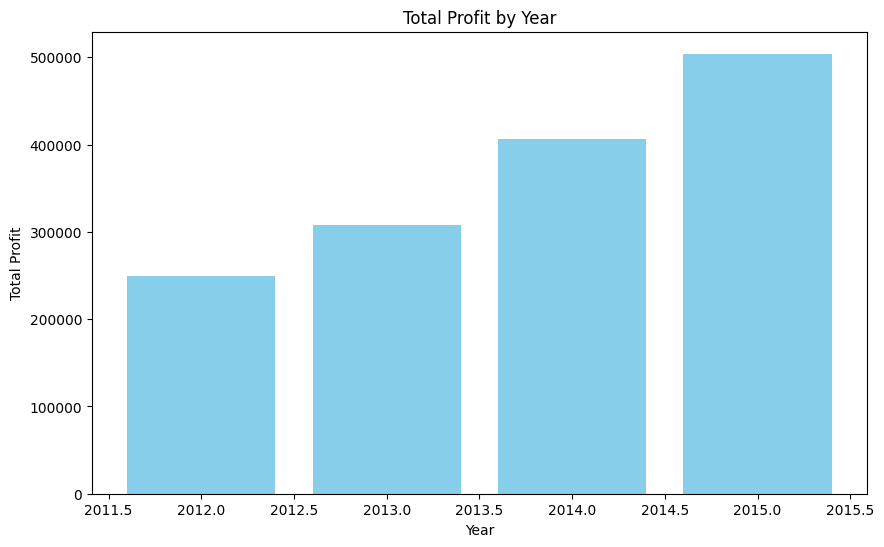

In [88]:
plt.figure(figsize=(10, 6))
plt.bar(profit_by_year.index, profit_by_year.values, color='skyblue') # Use .index to access the 'Year' values
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit by Year')
plt.show()

In [89]:
data_new.set_index('Order Date', inplace=True)
df_resampled = data_new['Profit'].resample('M').sum()  # Resample to monthly frequency

In [90]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df_resampled, order=(5, 1, 0))  # Example order
model_fit = model.fit()

# Forecast for next 2 years (24 months)
forecast = model_fit.forecast(steps=24)

In [91]:
from prophet import Prophet # Changed import statement to use prophet instead of fbprophet

# Prepare data for Prophet
df_prophet = df_resampled.reset_index()
df_prophet.columns = ['ds', 'y']

# Fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Forecast for next 2 years (24 months)
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwp5viymr/jq821hm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwp5viymr/75lcxg9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78597', 'data', 'file=/tmp/tmpwp5viymr/jq821hm4.json', 'init=/tmp/tmpwp5viymr/75lcxg9w.json', 'output', 'file=/tmp/tmpwp5viymr/prophet_modelcibcojse/prophet_model-20240908120808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


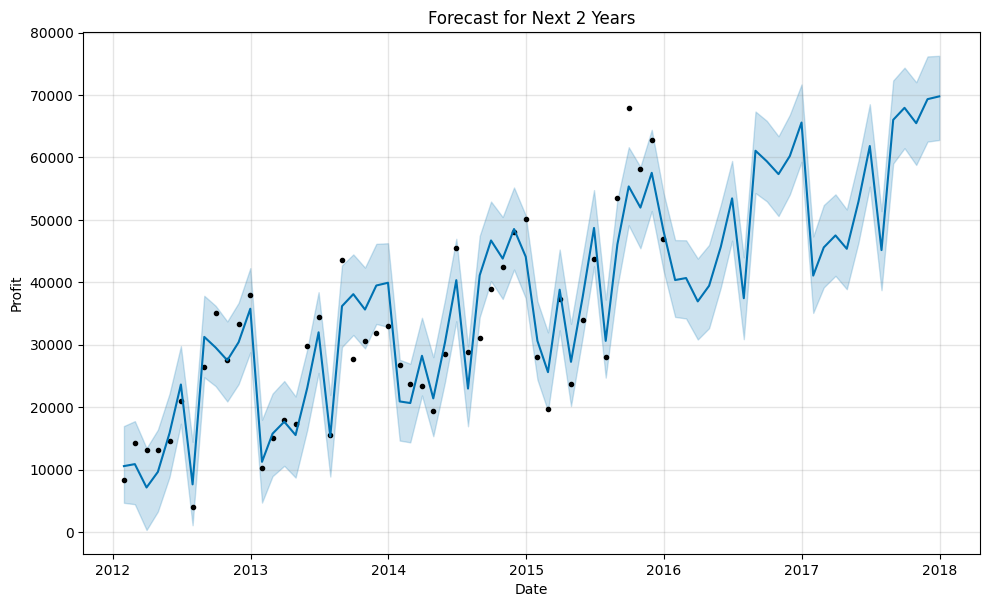

In [92]:
# Plot forecast
fig = model.plot(forecast)
plt.title('Forecast for Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

In [96]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,16673.727848,4683.138624,16974.695401,16673.727848,16673.727848,-6112.035548,-6112.035548,-6112.035548,-6112.035548,-6112.035548,-6112.035548,0.0,0.0,0.0,10561.692300
1,2012-02-29,17264.301231,4459.099672,17763.196278,17264.301231,17264.301231,-6383.936409,-6383.936409,-6383.936409,-6383.936409,-6383.936409,-6383.936409,0.0,0.0,0.0,10880.364822
2,2012-03-31,17895.603811,327.478899,13444.845317,17895.603811,17895.603811,-10757.552783,-10757.552783,-10757.552783,-10757.552783,-10757.552783,-10757.552783,0.0,0.0,0.0,7138.051028
3,2012-04-30,18506.541792,3286.537377,16391.434673,18506.541792,18506.541792,-8869.966470,-8869.966470,-8869.966470,-8869.966470,-8869.966470,-8869.966470,0.0,0.0,0.0,9636.575323
4,2012-05-31,19137.844371,8847.694721,22180.437490,19137.844371,19137.844371,-3273.283706,-3273.283706,-3273.283706,-3273.283706,-3273.283706,-3273.283706,0.0,0.0,0.0,15864.560665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2017-08-31,58285.873906,59020.736369,72318.544307,58280.430009,58291.506274,7734.308243,7734.308243,7734.308243,7734.308243,7734.308243,7734.308243,0.0,0.0,0.0,66020.182149
68,2017-09-30,58898.957335,61478.176552,74377.334386,58893.124287,58905.047611,9046.024463,9046.024463,9046.024463,9046.024463,9046.024463,9046.024463,0.0,0.0,0.0,67944.981797
69,2017-10-31,59532.476878,58798.384386,72040.804254,59526.150093,59539.032538,5951.991420,5951.991420,5951.991420,5951.991420,5951.991420,5951.991420,0.0,0.0,0.0,65484.468298
70,2017-11-30,60145.560306,62531.556363,76175.421618,60138.696300,60152.545700,9188.249117,9188.249117,9188.249117,9188.249117,9188.249117,9188.249117,0.0,0.0,0.0,69333.809423


###Loss Analysis ###

In [101]:
data_new.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Year'],
      dtype='object')

In [103]:
# Calculate the loss for each customer
data_new['Loss'] = -data_new['Profit']  # Assuming Profit is positive for gains, negative for losses

# Group by 'Customer Name' and sum the losses
customer_losses = data_new.groupby('Customer Name')['Loss'].sum()

# Sort by losses in descending order and get the top 10
top_10_customers = customer_losses.sort_values(ascending=True).head(10)

print(top_10_customers)

Customer Name
Tamara Chand      -8672.89890
Raymond Buch      -8453.04950
Sanjit Chand      -8205.37990
Hunter Lopez      -7816.56778
Bill Eplett       -7410.00530
Harry Marie       -6958.28640
Susan Pistek      -6484.40726
Mike Gockenbach   -6458.67620
Adrian Barton     -6417.28450
Tom Ashbrook      -6311.97910
Name: Loss, dtype: float64


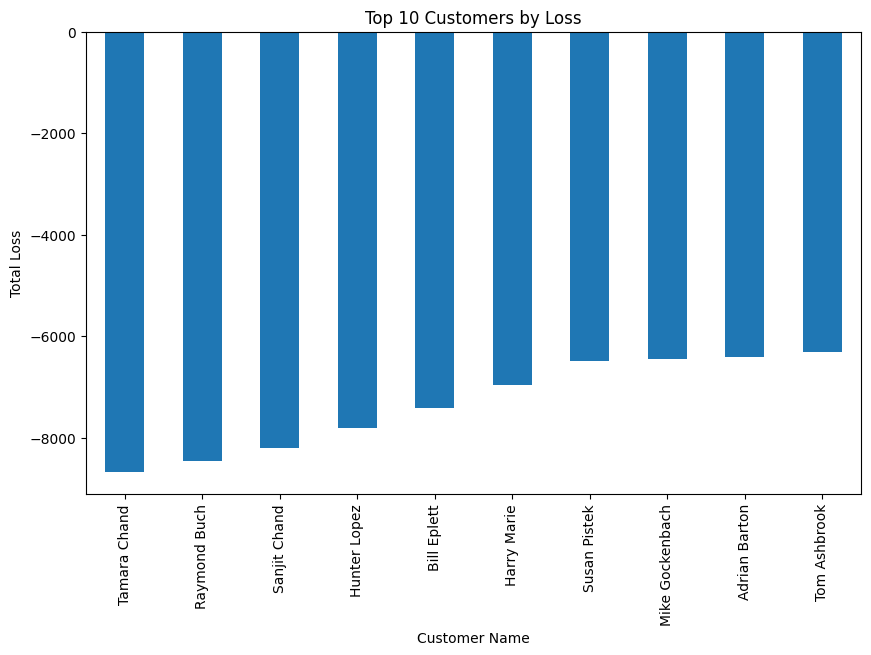

In [107]:
top_10_customers.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Customers by Loss')
plt.xlabel('Customer Name')
plt.ylabel('Total Loss')
plt.show()

In [108]:
correlations = data_new.select_dtypes(include=np.number).corr()
print(correlations['Profit'])

Row ID          -0.019037
Sales            0.484918
Quantity         0.104365
Discount        -0.316490
Profit           1.000000
Shipping Cost    0.354423
Year             0.002626
Loss            -1.000000
Name: Profit, dtype: float64


In [109]:
data_new=data_new.drop(['Row ID','Order ID','Customer ID','Product ID'],axis=1)

In [110]:
correlations = data_new.select_dtypes(include=np.number).corr()
print(correlations['Profit'])

Sales            0.484918
Quantity         0.104365
Discount        -0.316490
Profit           1.000000
Shipping Cost    0.354423
Year             0.002626
Loss            -1.000000
Name: Profit, dtype: float64


In [111]:
#Segment Analysis
# Group by Category and compute mean profit
category_profit = data_new.groupby('Category')['Profit'].mean().sort_values(ascending=False)
print(category_profit)

Category
Technology         65.454958
Furniture          28.913056
Office Supplies    16.574382
Name: Profit, dtype: float64


In [112]:
# Group by Sub-Category and compute mean profit
subcategory_profit = data_new.groupby('Sub-Category')['Profit'].mean().sort_values(ascending=False)
print(subcategory_profit)

Sub-Category
Copiers        116.314687
Appliances      81.264402
Bookcases       67.160688
Phones          64.556749
Accessories     42.154896
Chairs          40.884178
Machines        39.614989
Storage         21.472902
Paper           16.641367
Furnishings     14.852705
Envelopes       12.086086
Art             11.889363
Binders         11.785414
Supplies         9.372329
Labels           5.762754
Fasteners        5.322679
Tables         -74.429023
Name: Profit, dtype: float64


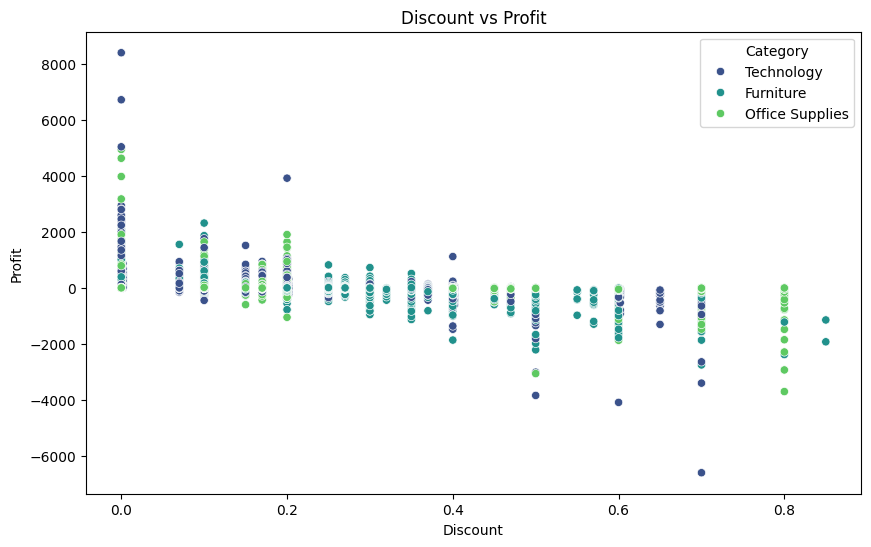

In [113]:
## Discount Impact
# Plot Discount vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=data_new, hue='Category', palette='viridis')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

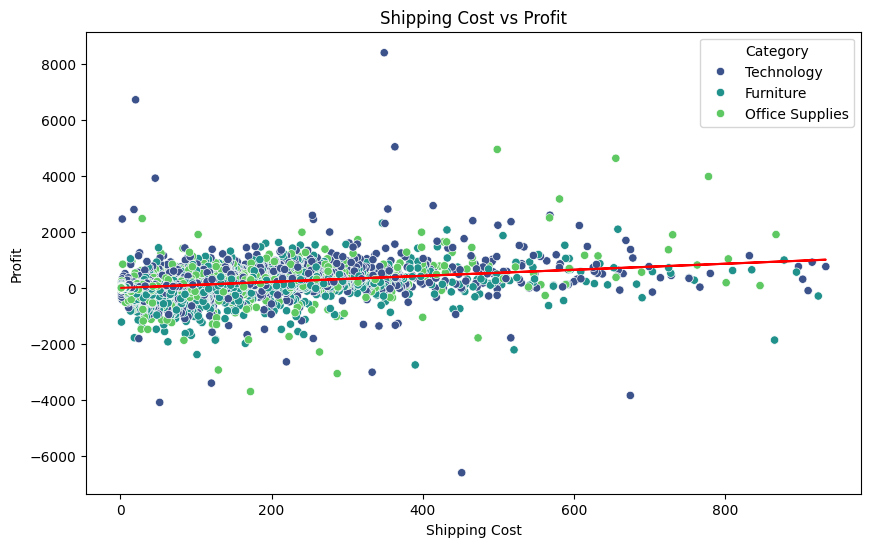

In [115]:
from sklearn.linear_model import LinearRegression

# Linear Regression to Estimate Demand Sensitivity to Price
X1 = data_new[['Shipping Cost']]
y1 = data_new['Profit']
model1 = LinearRegression().fit(X1, y1)
predictions1 = model1.predict(X1)

# Shipping Cost Analysis
# Plot Shipping Cost vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shipping Cost', y='Profit', data=data_new, hue='Category', palette='viridis')
plt.plot(X1, predictions1, color='red', label='Regression Line')
plt.title('Shipping Cost vs Profit')
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.show()

Data points indicate there is some variability in relationship between shipping cost and profit

The red line has a slight upward slop
this suggest there is a positive correlation (shipping cost increases profit tends to increase)

The slop of the line is not very steep. This indicate that the relationship between both is not very strong

In [116]:
#Customer Segmentation
# Group by Segment and compute mean profit
segment_profit = data_new.groupby('Segment')['Profit'].mean().sort_values(ascending=False)
print(segment_profit)

Segment
Home Office    29.648847
Corporate      28.596042
Consumer       28.254008
Name: Profit, dtype: float64


In [117]:
# Group by Order Priority and compute mean profit
priority_profit = data_new.groupby('Order Priority')['Profit'].mean().sort_values(ascending=False)
print(priority_profit)

Order Priority
Critical    31.593124
Medium      29.361729
High        27.119122
Low         24.197958
Name: Profit, dtype: float64


**Detailed Loss Analysis**

In [121]:
# Filter for customers with losses
losses = data_new[data_new['Profit'] < 0]

# Sort by absolute value of loss (Profit) in descending order and select top 10
top_10_losses = losses.assign(Absolute_Loss=losses['Profit'].abs()).sort_values(by='Absolute_Loss', ascending=False).head(10)

In [124]:
# Filter top 10 customers with highest losses
top_10_losses_detailed = data_new[data_new['Customer Name'].isin(top_10_losses['Customer Name'])]

# Analyze the factors contributing to losses
detailed_analysis = top_10_losses_detailed[['Customer Name', 'Category', 'Sub-Category', 'Discount', 'Shipping Cost', 'Sales', 'Quantity', 'Profit']].sort_values(by='Profit', ascending=False)
print(detailed_analysis)

               Customer Name         Category Sub-Category  Discount  \
Order Date                                                             
2015-04-09     Denise Monton  Office Supplies      Binders       0.0   
2015-10-02  Natalie Fritzler       Technology       Phones       0.0   
2014-11-27  Natalie Fritzler        Furniture    Bookcases       0.0   
2015-06-27     Denise Monton       Technology      Copiers       0.0   
2015-05-22     Denise Monton  Office Supplies      Storage       0.0   
...                      ...              ...          ...       ...   
2015-04-18    Sharelle Roach       Technology     Machines       0.7   
2012-07-25       Luke Foster  Office Supplies      Binders       0.8   
2015-11-05    Grant Thornton       Technology     Machines       0.5   
2014-09-26     Denise Monton       Technology       Phones       0.6   
2014-11-26     Cindy Stewart       Technology     Machines       0.7   

            Shipping Cost     Sales  Quantity     Profit  
Orde

In [129]:
detailed_analysis.tail(10)

,Customer Name,Category,Sub-Category,Discount,Shipping Cost,Sales,Quantity,Profit
Order Date,,,,,,,,
2013-12-15,Natalie Fritzler,Technology,Machines,0.7,219.62,1799.994,2,-2639.9912
2015-01-28,Julie Creighton,Furniture,Tables,0.7,390.09,2171.160,8,-2750.2800
2015-12-08,Henry Goldwyn,Office Supplies,Binders,0.8,129.51,1889.990,5,-2929.4845
2014-09-14,Skye Norling,Technology,Phones,0.5,333.10,3499.155,11,-3009.4350
2014-06-10,Saphhira Shifley,Office Supplies,Appliances,0.5,286.87,3399.660,12,-3059.8200
2015-04-18,Sharelle Roach,Technology,Machines,0.7,120.31,2549.985,5,-3399.9800
2012-07-25,Luke Foster,Office Supplies,Binders,0.8,172.07,2177.584,8,-3701.8928
2015-11-05,Grant Thornton,Technology,Machines,0.5,674.82,7999.980,4,-3839.9904
2014-09-26,Denise Monton,Technology,Phones,0.6,51.89,3085.344,12,-4088.3760


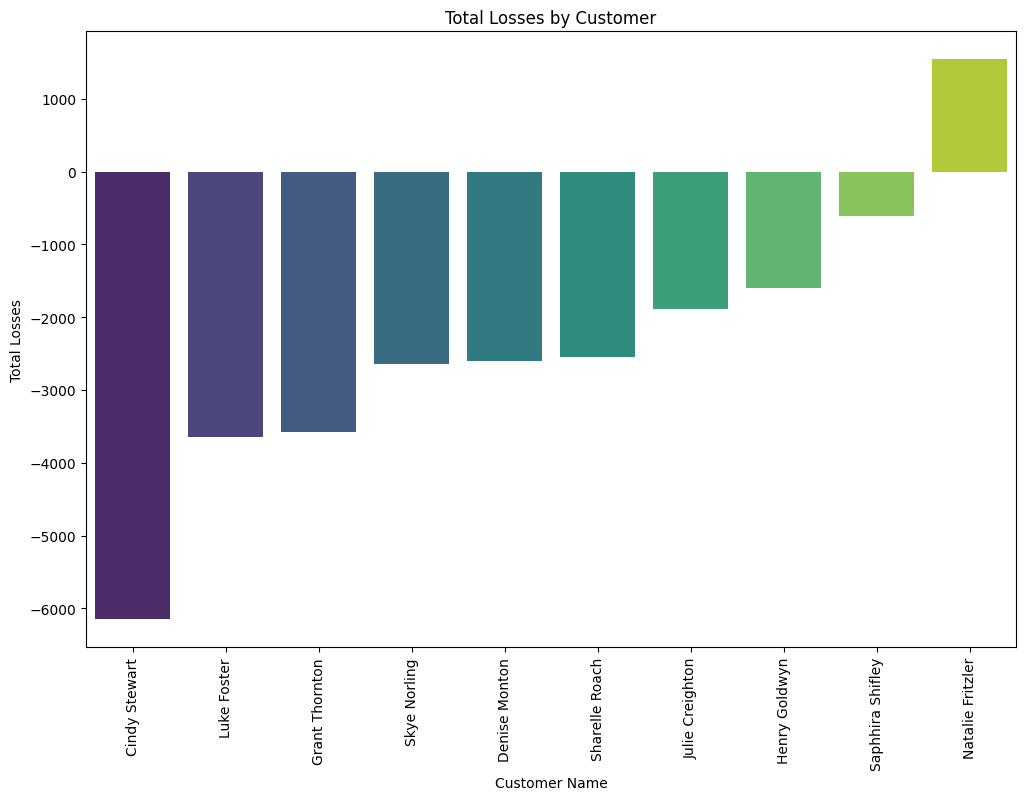

In [130]:
# Bar Chart for Total Losses by Customer
plt.figure(figsize=(12, 8))
losses_by_customer = top_10_losses_detailed.groupby('Customer Name')['Profit'].sum().sort_values()
sns.barplot(x=losses_by_customer.index, y=losses_by_customer.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Losses by Customer')
plt.xlabel('Customer Name')
plt.ylabel('Total Losses')
plt.show()

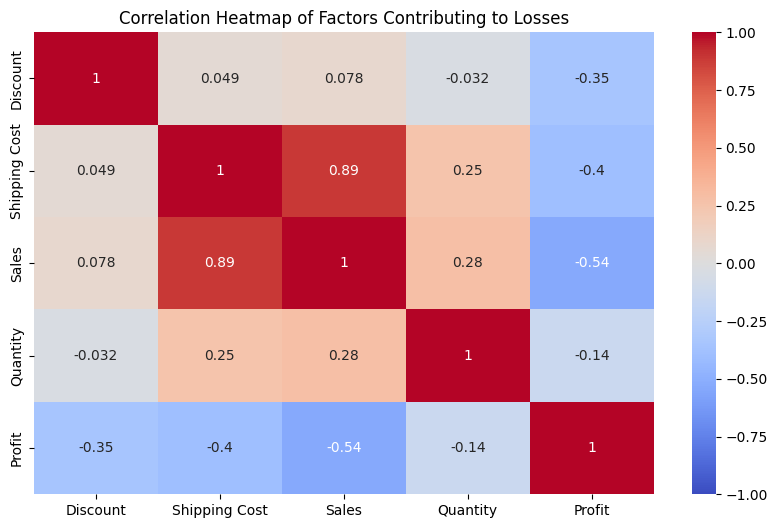

In [132]:
# Heatmap of Correlations between Factors
plt.figure(figsize=(10, 6))
correlation_matrix = detailed_analysis[['Discount', 'Shipping Cost', 'Sales', 'Quantity', 'Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Factors Contributing to Losses')
plt.show()

Profit and quantity: There is a strong negative correlation between profit and quantity. This suggests that higher quantities sold may lead to lower profits, possibly due to factors like economies of scale or pricing strategies.

Sales and profit: There is a strong positive correlation between sales and profit. This indicates that higher sales are generally associated with higher profits.

Sales and quantity: There is a strong positive correlation between sales and quantity. This suggests that higher sales are often achieved by selling larger quantities.

Shipping cost and profit: There is a moderate negative correlation between shipping cost and profit. This indicates that higher shipping costs can have a negative impact on profits.

Discount and profit: There is a moderate negative correlation between discount and profit. This suggests that offering discounts can reduce profits.



In [134]:

data_new.to_excel('data_new.xlsx', index=False)
